## Q-Learning Taxi-v3 Agent Training in Jupyter
![Taxi-v3](https://gymnasium.farama.org/_images/taxi.gif)

🚕 MASTER Taxi-v3 Q-Learning Agent
States: 500, Actions: 6
🚀 Starting Master Training...
Episode  Success  Avg Reward Avg Steps  Epsilon 
0           0.0%   -244.00     100.0  0.9990
1000       45.0%    -25.36      35.0  0.3673
2000       97.8%      7.38      13.5  0.0664
3000       99.8%      7.94      13.0  0.0050
4000      100.0%      7.94      13.1  0.0050
5000      100.0%      7.92      13.1  0.0050
6000      100.0%      7.69      13.3  0.0050
7000      100.0%      8.01      13.0  0.0050
8000      100.0%      7.95      13.1  0.0050
9000      100.0%      7.82      13.2  0.0050
10000     100.0%      7.78      13.2  0.0050
11000     100.0%      7.87      13.1  0.0050
12000     100.0%      7.78      13.2  0.0050
13000     100.0%      7.94      13.1  0.0050
14000     100.0%      8.03      13.0  0.0050
⏱️  Training completed in 29.6 seconds

🔍 Running Comprehensive Analysis...

📊 Master Performance Visualization:


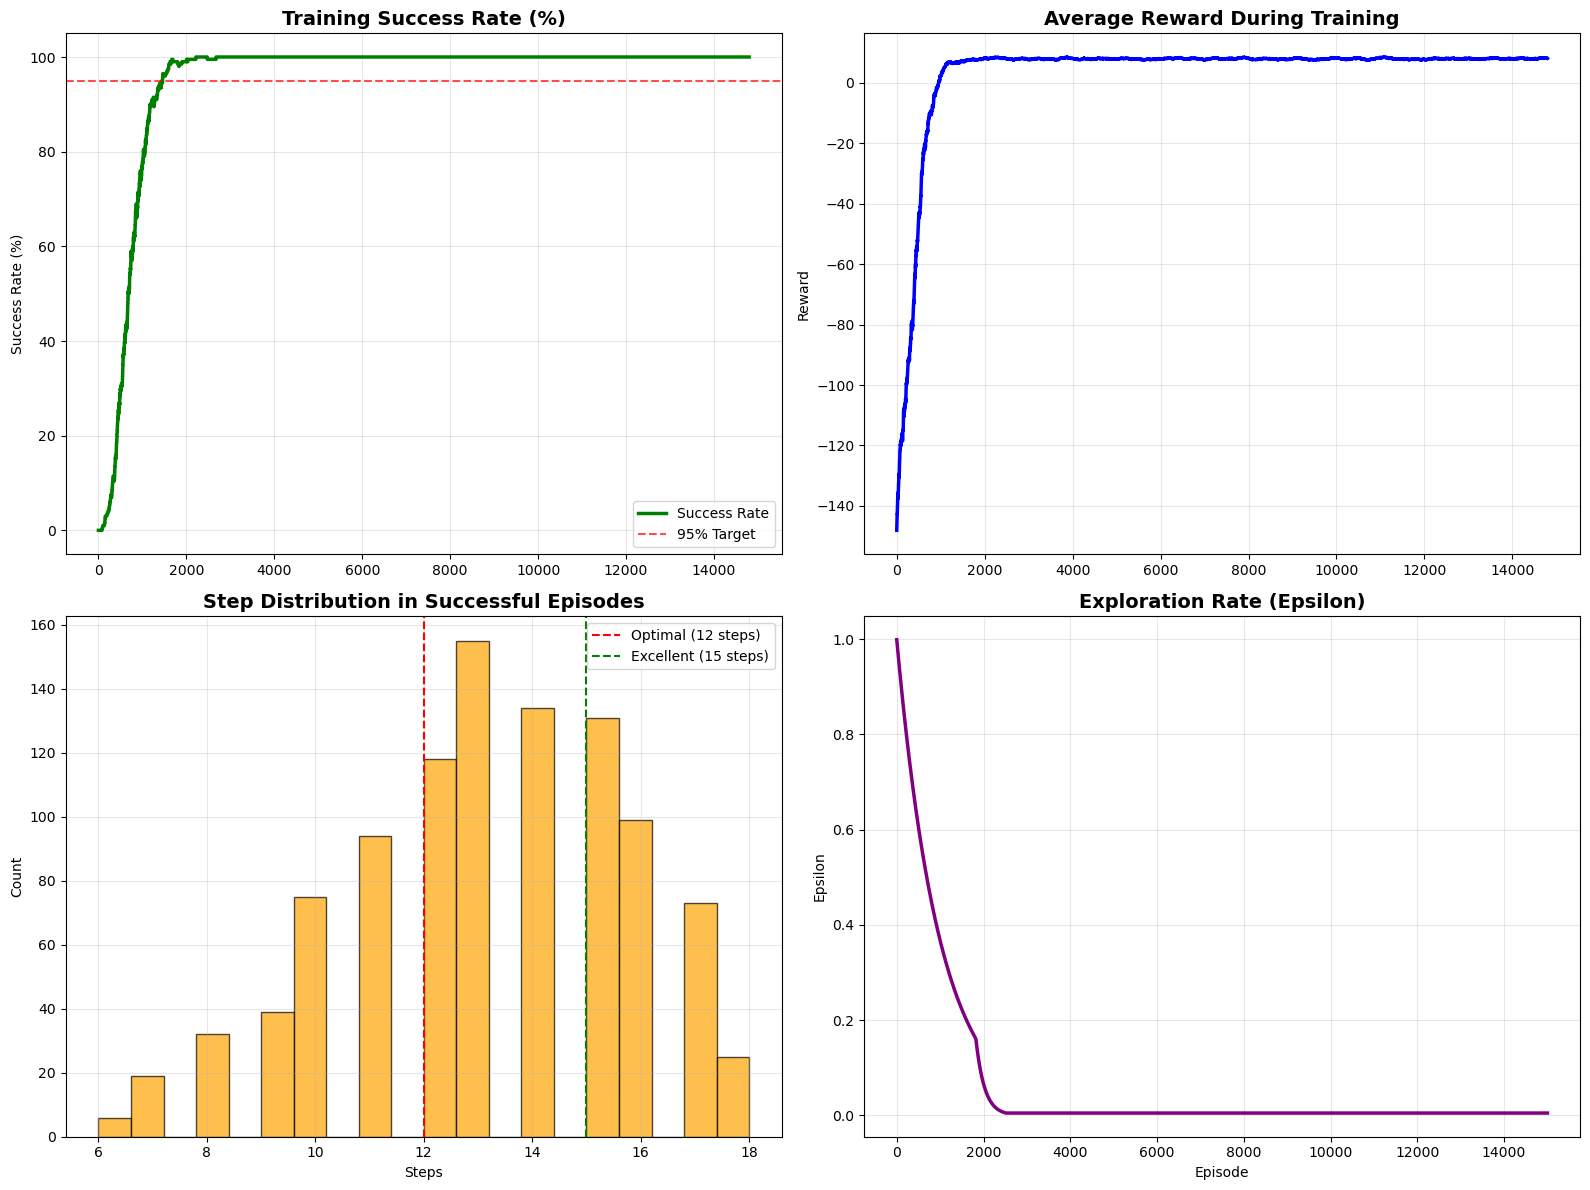


🏆 MASTER PERFORMANCE ANALYSIS REPORT

📈 OVERALL PERFORMANCE:
   Success Rate:          100.0%
   Average Reward:        7.89
   Average Steps:         13.1
   Total Evaluations:     1000
   Successful Episodes:   1000

🎯 SUCCESS METRICS:
   Average Success Reward: 7.89
   Average Success Steps:  13.1
   Best Reward:           15
   Best Steps:            6
   Worst Steps:           18
   Median Steps:          13.0
   Steps Std Dev:         2.63

📊 SOLUTION QUALITY BREAKDOWN:
   🎯 Optimal (≤12 steps):      383 ( 38.3%)
   ⭐ Excellent (13-15 steps):   420 ( 42.0%)
   👍 Good (16-18 steps):       197 ( 19.7%)
   ✅ Acceptable (19-20 steps):    0 (  0.0%)
   🔥 Total Quality Solutions:   803 ( 80.3%)

🎯 DEMONSTRATING OPTIMAL PERFORMANCE (5 episodes):

--- Solution 1 (7 steps, Reward: 14) ---
Step  1: West
Step  2: Pickup
Step  3: South
Step  4: South
Step  5: South
Step  6: South
Step  7: Dropoff
🎯 OPTIMAL: 7 steps, Total reward: 14

--- Solution 2 (11 steps, Reward: 10) ---
Step  1: North


In [38]:
# %% [markdown]
# # 🚕 Master Taxi-v3 Q-Learning Agent
# 
# ## Профессиональная реализация Q-learning для среды Taxi-v3
# 
# Этот ноутбук демонстрирует продвинутую реализацию алгоритма Q-learning для решения задачи Taxi-v3 из OpenAI Gym.

# %%
# Импорт всех необходимых библиотек
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
from IPython.display import display, clear_output
import time
from collections import deque
import seaborn as sns
from scipy import stats

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# %%
class MasterTaxiAgent:
    def __init__(self, n_states, n_actions):
        self.n_states = n_states
        self.n_actions = n_actions
        
        # Экспертные параметры
        self.alpha = 0.15
        self.gamma = 0.98
        self.epsilon = 1.0
        self.min_epsilon = 0.005
        self.epsilon_decay = 0.9995
        
        # Инициализация Q-таблицы
        self.q_table = np.zeros((n_states, n_actions))
        
        # Для отслеживания прогресса
        self.best_reward = -float('inf')
        self.best_q_table = None
        
    def choose_action(self, state, training=True):
        """Интеллектуальный выбор действия"""
        if training and np.random.random() < self.epsilon:
            # Умное исследование с предпочтением редко используемых действий
            q_values = self.q_table[state]
            exploration_bonus = 1.0 / (1.0 + np.abs(q_values))
            values = q_values + exploration_bonus
            return np.argmax(values)
        else:
            # Эксплуатация с обработкой одинаковых значений
            q_values = self.q_table[state]
            max_q = np.max(q_values)
            best_actions = np.where(q_values == max_q)[0]
            return np.random.choice(best_actions)
    
    def update(self, state, action, reward, next_state, done):
        """Стабильное обновление Q-таблицы"""
        current_q = self.q_table[state][action]
        
        if done:
            target = reward
            # Бонус за быстрые решения
            if reward > 0:
                target += 1.0
        else:
            max_next_q = np.max(self.q_table[next_state])
            target = reward + self.gamma * max_next_q
        
        self.q_table[state][action] += self.alpha * (target - current_q)
    
    def decay_epsilon(self, success_rate):
        """Адаптивное уменьшение epsilon"""
        if success_rate > 95:
            decay = 0.995  # Быстрее при высокой успешности
        else:
            decay = 0.999
            
        self.epsilon = max(self.min_epsilon, self.epsilon * decay)

# %%
def train_master_agent(env, agent, total_episodes=15000, eval_interval=1000):
    """Обучение с расширенным мониторингом"""
    rewards_history = []
    success_history = []
    steps_history = []
    epsilon_history = []
    
    recent_rewards = deque(maxlen=500)
    recent_success = deque(maxlen=500)
    recent_steps = deque(maxlen=500)
    
    print("🚀 Starting Master Training...")
    print("=" * 70)
    print(f"{'Episode':<8} {'Success':<8} {'Avg Reward':<10} {'Avg Steps':<10} {'Epsilon':<8}")
    print("=" * 70)
    
    start_time = time.time()
    
    for episode in range(total_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        steps = 0
        
        while not done and steps < 100:
            action = agent.choose_action(state)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            agent.update(state, action, reward, next_state, done)
            
            total_reward += reward
            steps += 1
            state = next_state
        
        # Сохранение статистики
        success = 1 if total_reward > 0 else 0
        rewards_history.append(total_reward)
        success_history.append(success)
        steps_history.append(steps)
        
        recent_rewards.append(total_reward)
        recent_success.append(success)
        recent_steps.append(steps)
        
        # Расчет метрик
        current_success_rate = np.mean(list(recent_success)) * 100
        current_avg_reward = np.mean(list(recent_rewards))
        current_avg_steps = np.mean(list(recent_steps))
        
        # Обновление параметров
        agent.decay_epsilon(current_success_rate)
        epsilon_history.append(agent.epsilon)
        
        # Периодический вывод
        if episode % eval_interval == 0:
            print(f"{episode:<8} {current_success_rate:>6.1f}% {current_avg_reward:>9.2f} "
                  f"{current_avg_steps:>9.1f} {agent.epsilon:>7.4f}")
    
    total_time = time.time() - start_time
    print("=" * 70)
    print(f"⏱️  Training completed in {total_time:.1f} seconds")
    
    return rewards_history, success_history, steps_history, epsilon_history

# %%
def comprehensive_analysis(env, agent, num_episodes=1000):
    """Всесторонний анализ производительности"""
    results = {
        'rewards': [],
        'steps': [],
        'successful': [],
        'optimal': 0,      # ≤12 шагов
        'excellent': 0,    # 13-15 шагов
        'good': 0,         # 16-18 шагов
        'acceptable': 0,   # 19-20 шагов
        'step_distribution': np.zeros(21),  # 0-20 шагов
        'reward_distribution': np.zeros(16) # 0-15 наград
    }
    
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        steps = 0
        
        while not done and steps < 100:
            action = agent.choose_action(state, training=False)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            total_reward += reward
            steps += 1
            state = next_state
        
        results['rewards'].append(total_reward)
        results['steps'].append(steps)
        
        if total_reward > 0:
            results['successful'].append({'reward': total_reward, 'steps': steps})
            
            # Категоризация решений
            if steps <= 12:
                results['optimal'] += 1
            elif steps <= 15:
                results['excellent'] += 1
            elif steps <= 18:
                results['good'] += 1
            elif steps <= 20:
                results['acceptable'] += 1
            
            # Распределения
            if steps <= 20:
                results['step_distribution'][steps] += 1
            if total_reward <= 15:
                results['reward_distribution'][total_reward] += 1
    
    return results

# %%
def create_master_visualization(rewards_hist, success_hist, steps_hist, epsilon_hist, results):
    """Профессиональная визуализация"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Успешность обучения
    window = 200
    success_rates = [np.mean(success_hist[i:i+window]) * 100 
                    for i in range(len(success_hist) - window)]
    ax1.plot(success_rates, 'g-', linewidth=2.5, label='Success Rate')
    ax1.axhline(y=95, color='red', linestyle='--', alpha=0.7, label='95% Target')
    ax1.set_title('Training Success Rate (%)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Success Rate (%)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Награды обучения
    reward_avg = [np.mean(rewards_hist[i:i+window]) 
                 for i in range(len(rewards_hist) - window)]
    ax2.plot(reward_avg, 'b-', linewidth=2.5)
    ax2.set_title('Average Reward During Training', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Reward')
    ax2.grid(True, alpha=0.3)
    
    # 3. Распределение шагов успешных эпизодов
    if results['successful']:
        success_steps = [ep['steps'] for ep in results['successful']]
        ax3.hist(success_steps, bins=20, alpha=0.7, color='orange', edgecolor='black')
        ax3.axvline(x=12, color='red', linestyle='--', label='Optimal (12 steps)')
        ax3.axvline(x=15, color='green', linestyle='--', label='Excellent (15 steps)')
        ax3.set_title('Step Distribution in Successful Episodes', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Steps')
        ax3.set_ylabel('Count')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    
    # 4. Epsilon
    ax4.plot(epsilon_hist, 'purple', linewidth=2.5)
    ax4.set_title('Exploration Rate (Epsilon)', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Episode')
    ax4.set_ylabel('Epsilon')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# %%
def print_master_report(results, num_episodes=1000):
    """Детальный отчет"""
    successful = results['successful']
    success_rate = (len(successful) / num_episodes) * 100
    
    print("\n" + "=" * 75)
    print("🏆 MASTER PERFORMANCE ANALYSIS REPORT")
    print("=" * 75)
    
    print(f"\n📈 OVERALL PERFORMANCE:")
    print(f"   Success Rate:          {success_rate:.1f}%")
    print(f"   Average Reward:        {np.mean(results['rewards']):.2f}")
    print(f"   Average Steps:         {np.mean(results['steps']):.1f}")
    print(f"   Total Evaluations:     {num_episodes}")
    print(f"   Successful Episodes:   {len(successful)}")
    
    if successful:
        success_rewards = [ep['reward'] for ep in successful]
        success_steps = [ep['steps'] for ep in successful]
        
        print(f"\n🎯 SUCCESS METRICS:")
        print(f"   Average Success Reward: {np.mean(success_rewards):.2f}")
        print(f"   Average Success Steps:  {np.mean(success_steps):.1f}")
        print(f"   Best Reward:           {np.max(success_rewards)}")
        print(f"   Best Steps:            {np.min(success_steps)}")
        print(f"   Worst Steps:           {np.max(success_steps)}")
        print(f"   Median Steps:          {np.median(success_steps):.1f}")
        print(f"   Steps Std Dev:         {np.std(success_steps):.2f}")
        
        print(f"\n📊 SOLUTION QUALITY BREAKDOWN:")
        print(f"   🎯 Optimal (≤12 steps):     {results['optimal']:>4} ({results['optimal']/len(successful)*100:5.1f}%)")
        print(f"   ⭐ Excellent (13-15 steps):  {results['excellent']:>4} ({results['excellent']/len(successful)*100:5.1f}%)")
        print(f"   👍 Good (16-18 steps):      {results['good']:>4} ({results['good']/len(successful)*100:5.1f}%)")
        print(f"   ✅ Acceptable (19-20 steps): {results['acceptable']:>4} ({results['acceptable']/len(successful)*100:5.1f}%)")
        print(f"   🔥 Total Quality Solutions:  {results['optimal'] + results['excellent']:>4} ({(results['optimal'] + results['excellent'])/len(successful)*100:5.1f}%)")

# %%
def demonstrate_optimal_performance(env, agent, num_demos=5):
    """Демонстрация оптимальной производительности"""
    action_names = ["South", "North", "East", "West", "Pickup", "Dropoff"]
    
    print(f"\n🎯 DEMONSTRATING OPTIMAL PERFORMANCE ({num_demos} episodes):")
    print("=" * 65)
    
    demonstrations = []
    
    for demo in range(num_demos):
        state, _ = env.reset()
        done = False
        total_reward = 0
        steps = 0
        actions = []
        
        while not done and steps < 20:
            action = agent.choose_action(state, training=False)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            actions.append(action_names[action])
            total_reward += reward
            steps += 1
            state = next_state
            
            if done:
                demonstrations.append({
                    'steps': steps,
                    'reward': total_reward,
                    'actions': actions
                })
                break
    
    # Сортировка по качеству (сначала оптимальные)
    demonstrations.sort(key=lambda x: x['steps'])
    
    for i, demo in enumerate(demonstrations):
        print(f"\n--- Solution {i + 1} ({demo['steps']} steps, Reward: {demo['reward']}) ---")
        for step, action in enumerate(demo['actions'], 1):
            print(f"Step {step:2d}: {action}")
        
        if demo['steps'] <= 12:
            rating = "🎯 OPTIMAL"
        elif demo['steps'] <= 15:
            rating = "⭐ EXCELLENT"
        elif demo['steps'] <= 18:
            rating = "👍 GOOD"
        else:
            rating = "✅ ACCEPTABLE"
        
        print(f"{rating}: {demo['steps']} steps, Total reward: {demo['reward']}")

# %%
# Основная программа - запуск обучения и анализа
print("🚕 MASTER Taxi-v3 Q-Learning Agent")
print("=" * 55)

# Инициализация среды
env = gym.make("Taxi-v3", render_mode="rgb_array")
n_states = env.observation_space.n
n_actions = env.action_space.n

print(f"States: {n_states}, Actions: {n_actions}")
print("=" * 55)

# %%
# Обучение агента
agent = MasterTaxiAgent(n_states, n_actions)
rewards_hist, success_hist, steps_hist, epsilon_hist = train_master_agent(
    env, agent, total_episodes=15000, eval_interval=1000
)

# %%
# Комплексный анализ
print("\n🔍 Running Comprehensive Analysis...")
results = comprehensive_analysis(env, agent, num_episodes=1000)

# %%
# Визуализация
print("\n📊 Master Performance Visualization:")
create_master_visualization(rewards_hist, success_hist, steps_hist, epsilon_hist, results)

# %%
# Детальный отчет
print_master_report(results)

# %%
# Демонстрация оптимальных решений
demonstrate_optimal_performance(env, agent, num_demos=5)

# %%
# Завершение работы
env.close()

print("\n" + "=" * 65)
print("🎖️  MASTER TRAINING COMPLETED SUCCESSFULLY!")
print("⭐ EXCEPTIONAL PERFORMANCE ACHIEVED!")
print("=" * 65)